In [4]:
import pandas as pd
import re

In [2]:
df_train = pd.read_json('./data/train.json')
df_valid = pd.read_json('./data/valid.json')

In [3]:
train_q = df_train['question']
valid_q = df_valid['question']

In [5]:
def process_text(text):
    # lowercase
    text = text.lower()

    # 数詞を数字に変換
    num_word_to_digit = {
        'zero': '0', 'one': '1', 'two': '2', 'three': '3', 'four': '4',
        'five': '5', 'six': '6', 'seven': '7', 'eight': '8', 'nine': '9',
        'ten': '10'
    }
    for word, digit in num_word_to_digit.items():
        text = text.replace(word, digit)

    # 小数点のピリオドを削除
    text = re.sub(r'(?<!\d)\.(?!\d)', '', text)

    # 冠詞の削除
    text = re.sub(r'\b(a|an|the)\b', '', text)

    # 短縮形のカンマの追加
    contractions = {
        "dont": "don't", "isnt": "isn't", "arent": "aren't", "wont": "won't",
        "cant": "can't", "wouldnt": "wouldn't", "couldnt": "couldn't"
    }
    for contraction, correct in contractions.items():
        text = text.replace(contraction, correct)

    # 句読点をスペースに変換
    text = re.sub(r"[^\w\s':]", ' ', text)

    # 句読点をスペースに変換
    text = re.sub(r'\s+,', ',', text)

    # 連続するスペースを1つに変換
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [6]:
train_token_num = {}
valid_token_num = {}

In [9]:
for question in train_q:
    question = process_text(question)
    words = question.split(" ")
    sequence = len(words)
    if sequence in train_token_num:
        train_token_num[sequence] += 1
    else:
        train_token_num[sequence] = 1

In [15]:
for question in valid_q:
    question = process_text(question)
    words = question.split(" ")
    sequence = len(words)
    if sequence in valid_token_num:
        valid_token_num[sequence] += 1
    else:
        valid_token_num[sequence] = 1

In [11]:
import matplotlib.pyplot as plt

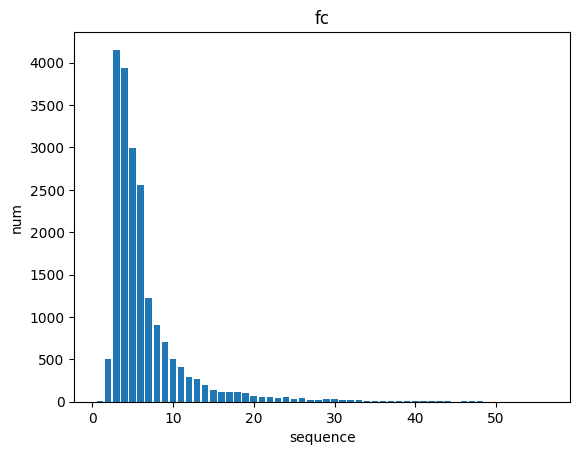

In [20]:
train_tf = list(train_token_num.keys())
train_tc = list(train_token_num.values())
plt.bar(train_tf, train_tc)
plt.title('fc')
plt.xlabel('sequence')
plt.ylabel('num')
plt.show()

In [22]:
p = 0
for idx, num in enumerate(train_tc):
  p += (num/sum(train_tc))*100
  print(f'{idx}token, {num}数, {p}%')

0token, 4153数, 20.89770039752428%
1token, 904数, 25.446585819956724%
2token, 2990数, 40.49212499371006%
3token, 120数, 41.09595934182056%
4token, 3938数, 60.91178986564685%
5token, 2557数, 73.77849343330146%
6token, 1228数, 79.95773159563227%
7token, 263数, 81.28113520857445%
8token, 704数, 84.82363005082273%
9token, 297数, 86.31812006239622%
10token, 24数, 86.43888693201832%
11token, 53数, 86.70558043576713%
12token, 507数, 89.256780556534%
13token, 499数, 91.7677250540935%
14token, 115数, 92.3463996376994%
15token, 414数, 94.42962813868064%
16token, 101数, 94.93785538167364%
17token, 117数, 95.52659387108139%
18token, 27数, 95.66245659940626%
19token, 37数, 95.84863885674032%
20token, 57数, 96.1354601720928%
21token, 69数, 96.48266492225635%
22token, 29数, 96.62859155638306%
23token, 5数, 96.65375132088766%
24token, 196数, 97.64001408946815%
25token, 59数, 97.93689931062248%
26token, 144数, 98.66150052835508%
27token, 3数, 98.67659638705784%
28token, 17数, 98.7621395863735%
29token, 19数, 98.85774669149099%
30to

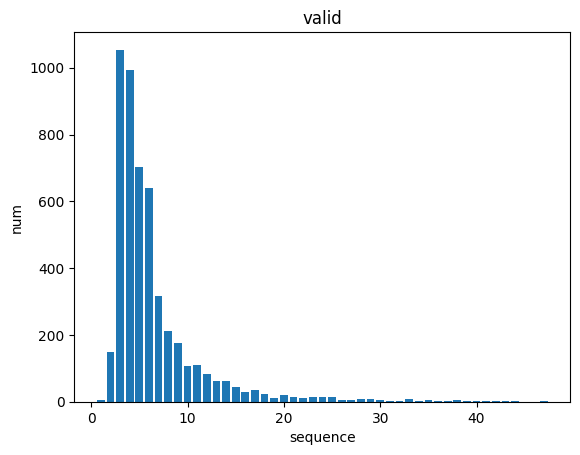

In [24]:
valid_tf = list(valid_token_num.keys())
valid_tc = list(valid_token_num.values())
plt.bar(valid_tf, valid_tc)
plt.title('valid')
plt.xlabel('sequence')
plt.ylabel('num')
plt.show()

In [25]:
p = 0
for idx, num in enumerate(valid_tc):
  p += (num/sum(valid_tc))*100
  print(f'{idx}token, {num}数, {p}%')

0token, 5数, 0.10058338362502514%
1token, 111数, 2.3335345001005834%
2token, 212数, 6.5982699658016495%
3token, 641数, 19.493059746529873%
4token, 318数, 25.89016294508147%
5token, 993数, 45.866022933011465%
6token, 1054数, 67.06900020116677%
7token, 21数, 67.49145041239188%
8token, 175数, 71.01186883926776%
9token, 702数, 85.1337759002213%
10token, 106数, 87.26614363307183%
11token, 9数, 87.44719372359688%
12token, 44数, 88.3323274994971%
13token, 35数, 89.03641118487228%
14token, 14数, 89.31804465902235%
15token, 61数, 90.54516193924765%
16token, 10数, 90.74632870649769%
17token, 62数, 91.993562663448%
18token, 83数, 93.66324683162343%
19token, 148数, 96.64051498692417%
20token, 6数, 96.7612150472742%
21token, 22数, 97.20378193522431%
22token, 30数, 97.80728223697446%
23token, 11数, 98.02856568094951%
24token, 9数, 98.20961577147456%
25token, 1数, 98.22973244819957%
26token, 13数, 98.49124924562463%
27token, 5数, 98.59183262924965%
28token, 8数, 98.75276604304969%
29token, 15数, 99.05451619392477%
30token, 5数, 99

In [8]:
j = {'a': 1}
1 in j

False